# Week 13 - Bivariate Analysis 2 - Statistics

# 

# 1. Lesson

We are going to consider some statistical tests that you can apply to your data.

### T-tests

You can use a t-test to discern whether the means of two sets of numbers might be the same.  The t-test is useful for data that are normally distributed.  The data should also have approximately equal variances.  Of course you can run a t-test for data that don't fit these criteria, but the less well it fits, the more likely that the t-test will give the wrong result.

First, here is a one-sample t-test to see if you have made a correct guess about the underlying mean:

In [21]:
from scipy import stats
import numpy as np
np.random.seed(0)
arr1 = np.random.normal(loc = 0, size = 1000)
t_stat, p_value = stats.ttest_1samp(arr1, 0)
# The array might have a mean of 0; p > 0.05.  In fact, it does have a mean of 0.
print(p_value)

0.14759031545459375


In [22]:
# The array probably does not have a mean of 0.1; p < 0.05.  In fact, it doesn't.
t_stat, p_value = stats.ttest_1samp(arr1, 0.1)
print(p_value)

3.738968246353356e-06


In [23]:
arr2 = np.random.normal(loc = 0, size = 10)
t_stat, p_value = stats.ttest_1samp(arr2, 0.1)
# This array might have a mean of 0.1; p > 0.05.  In fact, it doesn't - but since there are only ten samples, we can't tell that
print(p_value)

0.8283790364046455


In [24]:
arr3 = np.random.normal(loc = 0.1, size = 1000)
t_stat, p_value = stats.ttest_ind(arr1, arr3)
# The two arrays probably have different means; p < 0.05.  In fact, they do have different means; 0 and 0.1
print(p_value)

0.0004525039970281393


### Mann-Whitney U-test

This test is used to determine whether two sets of numbers might come from the same distribution - but without making any assumptions about the data being normally distributed.

In [25]:
u_value, p_value = stats.mannwhitneyu(arr1, arr3)
# The two arrays probably come from different distributions.  In fact, they do; one comes from mean = 0, one mean = 1.
print(p_value)

0.0006158714688322862


In [26]:
np.random.seed(0)
arr4 = np.concatenate([np.zeros(10) + 0.01, np.array([1])])
arr5 = np.concatenate([np.zeros(10) - 0.01, np.array([-1])])
t_stat, p_value = stats.ttest_ind(arr4, arr5)
# Here is an example where the t-test fails due to the non-normality of the data.  The data do come from different 
# distributions with different means, but the t-test fails to detect it.
print(p_value)

0.13178840154670063


In [27]:
u_value, p_value = stats.mannwhitneyu(arr4, arr5)
# The two arrays probably come from different distributions.  In fact, they do; see above.
# It is unusual for the t-test to fail due to non-normality but the Mann-Whitney U-test to succeed, but it can happen as in this case.
print(p_value)

1.2550539978736685e-05


### ANOVA: categorical data plotted vs. continous data

ANOVA is a t-test generalized to more than two groups

In [28]:
np.random.seed(0)
arr6 = np.random.normal(loc = 0, size = 1000)
arr7 = np.random.normal(loc = 0.1, size = 1000)
arr8 = np.random.normal(loc = 0.2, size = 1000)
result = stats.f_oneway(arr1, arr3, arr6)
# The three arrays probably have different means; p < 0.05.  In fact, as you can see, they do have different means.
print(result.pvalue)

0.00028601982658831227


### Chi-square: categorical data plotted vs. categorical data

Chi-square will test for statistical independence between counts for two categorical features.  To do this, it requires a matrix of numbers: one feature corresponds to the row and one to the column.  The numbers must be counts.  Thus, if the category for the column is weather (cloudy or sunny) and the category for the row is temperature (low, medium, or high), then the count of days in the month at that temperature and weather would be a good variable for chi-square.

In [29]:
arr9 = np.array([[10, 0], [5, 5], [0, 10]])
result = stats.chi2_contingency(arr9)
# Different rows are very different.  Each row is _not_ a fixed multiple of each other, so the variables are not independent.
# Thus, the chi-squared test shows that the data are not independent.  
# In the next example, we will elaborate on what kind of difference is involved
print(result.pvalue)

4.539992976248486e-05


The specific goal of the chi-squared contingency table test is to find out whether the table possesses statistical independence - which is to say, it asks whether each number can be written as a product of two other numbers: one for its row and one for its column.  For example, suppose two stores, A and B, sell two kinds of apples, red and green.  If the number of apples sold is independent, it would mean that we can multiply to get the number sold.  That is, the fraction of the apples that are red and sold at store A would approximately equal the fraction red multiplied by the fraction sold at store A.

In [30]:
A_B_values = np.array([0.4, 0.6])
red_green_values = np.array([0.7, 0.3])
outer_product = 50 * np.outer(A_B_values, red_green_values)
print(outer_product)

[[14.  6.]
 [21.  9.]]


The chi-squared test returns a null result due to the complete independence of the values.  (p > 0.05).  Each row is precisely a fixed multiple of the other.  As above, a low p-value means dependence and a high p-value means independence.

In [31]:
result = stats.chi2_contingency(outer_product)
print(result.pvalue)

1.0


In [32]:
arr9 = np.array([[10, 0], [9, 1], [8, 2]])
result = stats.chi2_contingency(arr9)
# Here, the first columns (10, 9, 8) is quite different in its ratios compared with the second (0, 1, 2)
# However, because the second column has low counts, it is conceivable that these ratios could not be the true ratios.
# This means that perhaps the variables are independent after all, leading to a relatively high p-value - we cannot say for
# sure that the data are not independent.  We'd need more data to say that.
print(result.pvalue)

0.3291929878079054


In [33]:
result = stats.chi2_contingency(arr9 * 3)
# If we have a lot more data, even with the exact same ratios between the rows, we become more certain that the data are not independent
print(arr9 * 3)
print(result.pvalue)

[[30  0]
 [27  3]
 [24  6]]
0.035673993347252395


# 2. Weekly graph question

Which of the following graph color schemes would you choose, and why?

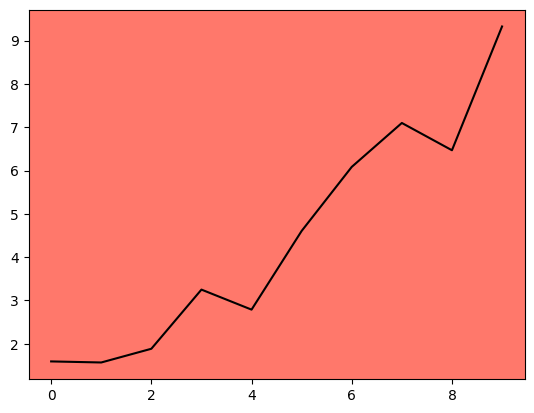

In [34]:
import matplotlib.pyplot as plt
arr10 = np.arange(10)
arr11 = np.random.normal(size = 10) + np.arange(10)
fig = plt.plot(arr10, arr11, c = "black")
ax = plt.gca()
ax.set_facecolor((1.0, 0.47, 0.42))

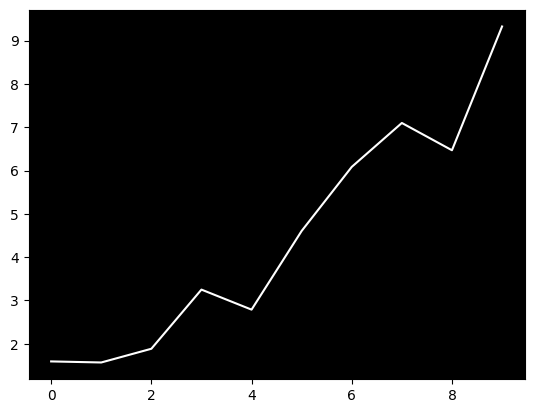

In [35]:
fig = plt.plot(arr10, arr11, c = "white")
ax = plt.gca()
ax.set_facecolor((0, 0, 0))

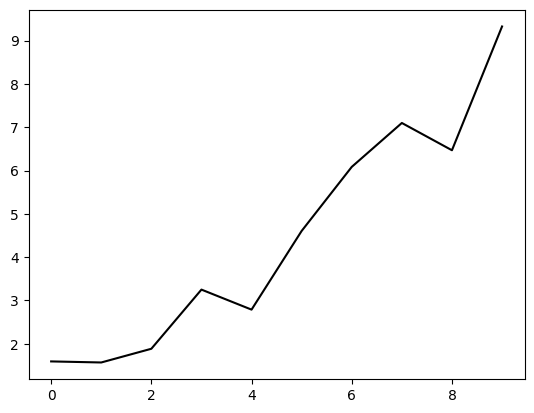

In [36]:
fig = plt.plot(arr10, arr11, c = "black")
ax = plt.gca()
ax.set_facecolor((1, 1, 1))

1. First Graph (Red background, black line)
Pros: High contrast; visually striking.

Cons: The red background can be overwhelming or visually fatiguing, especially for longer viewing or presentations. It may also be harder for colorblind users.

Best for: Highlighting critical or urgent data (e.g., risk, danger zones) in a dramatic way.

2. Second Graph (Black background, white line)
Pros: Very high contrast, modern look, good for dark mode presentations.

Cons: Might print poorly on paper, and not always ideal for accessibility. Can feel heavy or harsh in certain contexts.

Best for: Presentations in dark-themed environments (e.g., dashboards, slideshows in dark rooms).


3. Third Graph (White background, black line)
Pros: Classic and most readable across various mediums (screens, paper, print). It’s clean, simple, and effective.

Cons: Less visually exciting, might not stand out in a highly stylized dashboard.

Best for: Reports, academic work, publications, and general-purpose use.


I will choose the third graph (white background, black line) unless you have a specific reason to emphasize aesthetics or dark mode visuals. It offers the best balance of clarity, professionalism, and accessibility.

# 3. Homework

* Create a dataset showing flowers that have been fertilized with two brands of fertilizer.  The data show the heights of the flowers.  One fertilizer is better than the other, leading to taller flowers - but only slightly taller.
* The flowers have some height distribution that is _not_ normal.
* Use a t-test and a Mann-Whitney U test to determine whether the flowers have the same height.  (In this case, try the t-test even though the distribution it not normal.  However, that is not always a good idea!)
* Actually, create two datasets: one where the t-test works (and detects the slight height difference) and one where the t-test fails.
* Draw a box and whisker plot or histogram showing the distribution of the flower heights in each case.  Can you see the difference?
* Next, create a dataset showing five different brands of fertilizer, leading to five somewhat different height distributions.  Use an ANOVA test to detect the height differences.  Does the ANOVA test work?
* Finally, create a dataset showing the heights of four different flower types for each of the five brand of fertilizers (one height for each pair, so 4 x 5 = 20 heights).  Use a chi squared test to check whether the five different fertilizers lead to different flower heights.

In [37]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Simulate 50 flowers for each brand
n = 50

# Brand A: mean height = 30 cm, std = 5 cm
brand_a_heights = np.random.normal(loc=30, scale=5, size=n)

# Brand B: mean height = 31.5 cm (slightly taller), std = 5 cm
brand_b_heights = np.random.normal(loc=31.5, scale=5, size=n)

# Create DataFrame
df = pd.DataFrame({
    'Fertilizer_Brand': ['A'] * n + ['B'] * n,
    'Flower_Height_cm': np.concatenate([brand_a_heights, brand_b_heights])
})

# Shuffle rows
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display first few rows
print(df.head())

  Fertilizer_Brand  Flower_Height_cm
0                B         28.908649
1                B         34.558381
2                B         33.306978
3                A         26.400779
4                A         22.607390


In [38]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu

np.random.seed(42)
n = 50

# Simulate log-normal distributed flower heights
brand_a = np.random.lognormal(mean=3.35, sigma=0.2, size=n)
brand_b = np.random.lognormal(mean=3.4, sigma=0.2, size=n)

# Combine into DataFrame (optional)
df = pd.DataFrame({
    'Fertilizer_Brand': ['A'] * n + ['B'] * n,
    'Flower_Height_cm': np.concatenate([brand_a, brand_b])
})

# Run t-test (assuming equal variances)
t_stat, t_p = ttest_ind(brand_a, brand_b, equal_var=True)

# Run Mann-Whitney U test (non-parametric)
u_stat, u_p = mannwhitneyu(brand_a, brand_b, alternative='two-sided')

# Display results
print("T-test:")
print(f"  t-statistic = {t_stat:.4f}")
print(f"  p-value     = {t_p:.4f}\n")

print("Mann-Whitney U test:")
print(f"  U statistic = {u_stat}")
print(f"  p-value     = {u_p:.4f}")

T-test:
  t-statistic = -2.6807
  p-value     = 0.0086

Mann-Whitney U test:
  U statistic = 839.0
  p-value     = 0.0047


In [39]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu

np.random.seed(42)
n = 50

### 1. Normal Data (t-test should work)
normal_A = np.random.normal(loc=30, scale=5, size=n)
normal_B = np.random.normal(loc=31.5, scale=5, size=n)

### 2. Skewed Data (same mean diff, but t-test may fail)
skewed_A = np.random.lognormal(mean=3.35, sigma=0.4, size=n)
skewed_B = np.random.lognormal(mean=3.4, sigma=0.4, size=n)

def run_tests(data_A, data_B, label):
    print(f"\n--- {label} ---")
    
    # T-test
    t_stat, t_p = ttest_ind(data_A, data_B, equal_var=True)
    print(f"T-test p-value:         {t_p:.4f}")
    
    # Mann-Whitney U test
    u_stat, u_p = mannwhitneyu(data_A, data_B, alternative='two-sided')
    print(f"Mann-Whitney U p-value: {u_p:.4f}")
    
    # Means for reference
    print(f"Mean A: {np.mean(data_A):.2f}, Mean B: {np.mean(data_B):.2f}")

# Run both tests
run_tests(normal_A, normal_B, "Normal Distribution (t-test should work)")
run_tests(skewed_A, skewed_B, "Skewed Distribution (t-test may fail)")


--- Normal Distribution (t-test should work) ---
T-test p-value:         0.0034
Mann-Whitney U p-value: 0.0021
Mean A: 28.87, Mean B: 31.59

--- Skewed Distribution (t-test may fail) ---
T-test p-value:         0.3396
Mann-Whitney U p-value: 0.1356
Mean A: 30.52, Mean B: 33.12



--- Normal Distribution (t-test should work) ---
T-test p-value:         0.0034
Mann-Whitney U p-value: 0.0021
Mean A: 28.87, Mean B: 31.59

--- Skewed Distribution (t-test may fail) ---
T-test p-value:         0.3396
Mann-Whitney U p-value: 0.1356
Mean A: 30.52, Mean B: 33.12


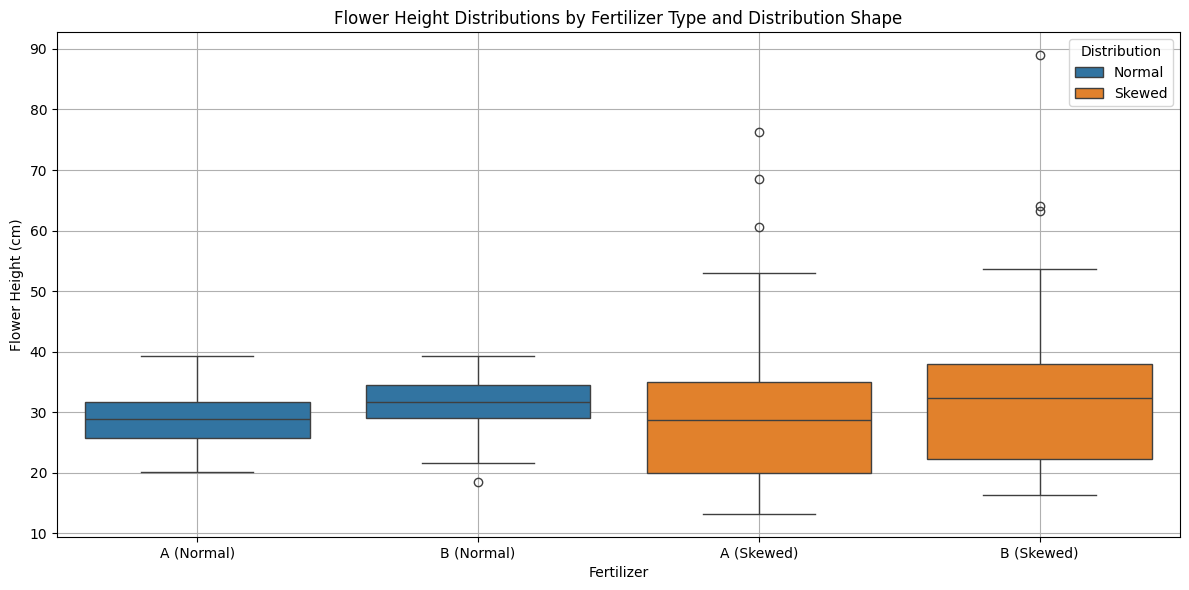

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu

# Set random seed for reproducibility
np.random.seed(42)
n = 50

# Generate normally distributed data
normal_A = np.random.normal(loc=30, scale=5, size=n)
normal_B = np.random.normal(loc=31.5, scale=5, size=n)

# Generate skewed (log-normal) data
skewed_A = np.random.lognormal(mean=3.35, sigma=0.4, size=n)
skewed_B = np.random.lognormal(mean=3.4, sigma=0.4, size=n)

# Combine data into DataFrame
df = pd.DataFrame({
    'Height': np.concatenate([normal_A, normal_B, skewed_A, skewed_B]),
    'Fertilizer': ['A (Normal)'] * n + ['B (Normal)'] * n +
                  ['A (Skewed)'] * n + ['B (Skewed)'] * n,
    'Distribution': ['Normal'] * (2 * n) + ['Skewed'] * (2 * n)
})

# --- Run Statistical Tests ---
def run_tests(data_A, data_B, label):
    print(f"\n--- {label} ---")
    # T-test
    t_stat, t_p = ttest_ind(data_A, data_B, equal_var=True)
    print(f"T-test p-value:         {t_p:.4f}")
    # Mann-Whitney U
    u_stat, u_p = mannwhitneyu(data_A, data_B, alternative='two-sided')
    print(f"Mann-Whitney U p-value: {u_p:.4f}")
    # Mean values
    print(f"Mean A: {np.mean(data_A):.2f}, Mean B: {np.mean(data_B):.2f}")

# Apply tests to both datasets
run_tests(normal_A, normal_B, "Normal Distribution (t-test should work)")
run_tests(skewed_A, skewed_B, "Skewed Distribution (t-test may fail)")

# --- Plot ---
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Fertilizer', y='Height', hue='Distribution')
plt.title("Flower Height Distributions by Fertilizer Type and Distribution Shape")
plt.ylabel("Flower Height (cm)")
plt.grid(True)
plt.tight_layout()
plt.show()

ANOVA F-statistic = 5.0328, p-value = 0.0006
Kruskal-Wallis H-statistic = 20.6907, p-value = 0.0004


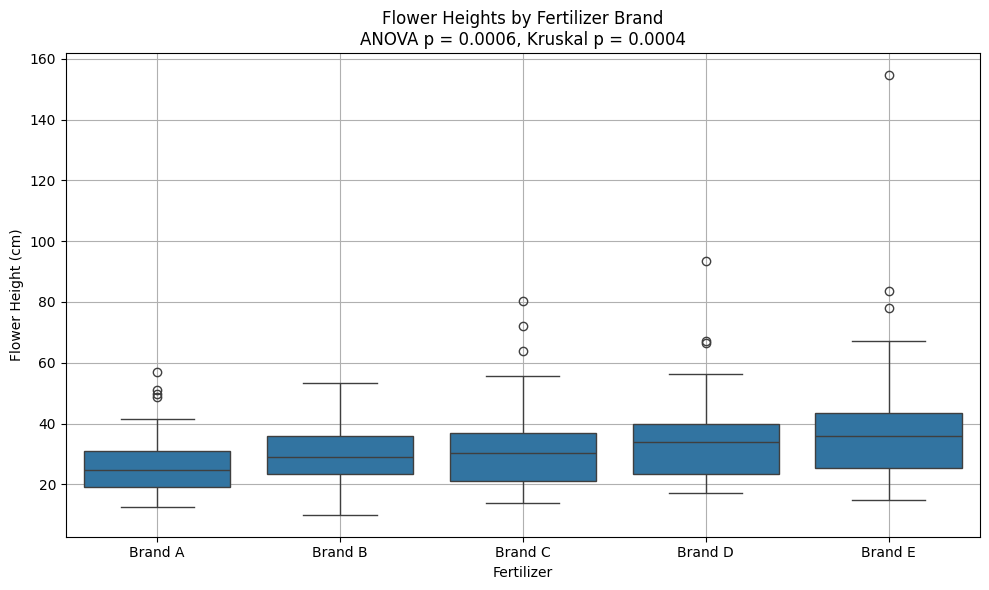

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal

# Set seed
np.random.seed(42)
n = 50  # samples per fertilizer
means = [3.3, 3.35, 3.4, 3.45, 3.5]  # log-means for slight differences

# Generate data for each brand
fertilizer_data = []
labels = []
for i, mean in enumerate(means):
    heights = np.random.lognormal(mean=mean, sigma=0.4, size=n)
    fertilizer_data.append(heights)
    labels.extend([f"Brand {chr(65 + i)}"] * n)  # Brand A, B, C...

# Flatten into DataFrame
df = pd.DataFrame({
    'Fertilizer': labels,
    'Height': np.concatenate(fertilizer_data)
})

# --- ANOVA test ---
anova_stat, anova_p = f_oneway(*fertilizer_data)
print(f"ANOVA F-statistic = {anova_stat:.4f}, p-value = {anova_p:.4f}")

# --- Kruskal-Wallis test (non-parametric) ---
kruskal_stat, kruskal_p = kruskal(*fertilizer_data)
print(f"Kruskal-Wallis H-statistic = {kruskal_stat:.4f}, p-value = {kruskal_p:.4f}")

# --- Plot ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Fertilizer', y='Height')
plt.title(f"Flower Heights by Fertilizer Brand\nANOVA p = {anova_p:.4f}, Kruskal p = {kruskal_p:.4f}")
plt.ylabel("Flower Height (cm)")
plt.grid(True)
plt.tight_layout()
plt.show()

The p-value is well below 0.05, so the ANOVA test detects significant differences among the five fertilizer brands.

Despite the non-normal (log-normal) distribution, ANOVA still worked in this case because:

The sample size per group (n = 50) is reasonably large.

The variance across groups is not drastically different.

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Set seed
np.random.seed(42)

# Simulate 4 flower types × 5 fertilizers (one height per pair)
flower_types = ['Tulip', 'Rose', 'Lily', 'Daisy']
fertilizers = ['A', 'B', 'C', 'D', 'E']
means = [30, 31, 32, 33, 34]  # Fertilizer effects (slightly increasing)

data = []
for i, fert in enumerate(fertilizers):
    for flower in flower_types:
        height = np.random.normal(loc=means[i], scale=2.5)  # add random noise
        data.append((flower, fert, height))

df = pd.DataFrame(data, columns=['Flower_Type', 'Fertilizer', 'Height'])

# Bin height into categories
bins = [0, 30, 33, np.inf]
labels = ['Short', 'Medium', 'Tall']
df['Height_Category'] = pd.cut(df['Height'], bins=bins, labels=labels)

# Create contingency table
contingency = pd.crosstab(df['Fertilizer'], df['Height_Category'])

# Perform Chi-Squared test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)

# Print results
print("Contingency Table:\n", contingency)
print(f"\nChi-squared Statistic = {chi2_stat:.4f}")
print(f"Degrees of Freedom     = {dof}")
print(f"P-value                = {p_val:.4f}")

Contingency Table:
 Height_Category  Short  Medium  Tall
Fertilizer                          
A                    1       2     1
B                    0       3     1
C                    0       3     1
D                    2       1     1
E                    0       3     1

Chi-squared Statistic = 6.6667
Degrees of Freedom     = 8
P-value                = 0.5730


# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter nine, stopping before case study 4 (p. 206-227) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.

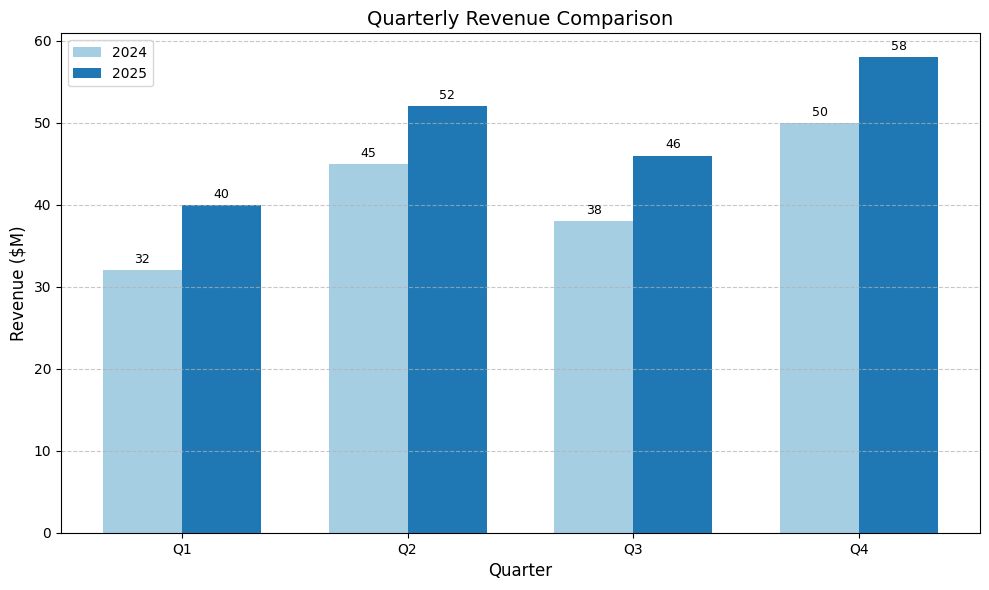

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
values_2024 = [32, 45, 38, 50]  # mock values for 2024
values_2025 = [40, 52, 46, 58]  # mock values for 2025

x = np.arange(len(quarters))  # label locations
width = 0.35  # width of the bars

# Create figure and axes
plt.figure(figsize=(10, 6))

# Plot bars
bars_2024 = plt.bar(x - width/2, values_2024, width, label='2024', color='#A6CEE3')
bars_2025 = plt.bar(x + width/2, values_2025, width, label='2025', color='#1F78B4')

# Add value labels to bars
for bar in bars_2024 + bars_2025:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

# Customize plot
plt.ylabel('Revenue ($M)', fontsize=12)
plt.xlabel('Quarter', fontsize=12)
plt.title('Quarterly Revenue Comparison', fontsize=14)
plt.xticks(x, quarters)
plt.legend()

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Layout adjustments
plt.tight_layout()

# Show plot
plt.show()